Q1. You are a data analyst at an e-commerce company. Your task is to analyze sales data,
clean and process it, perform staƟsƟcal analysis, and generate visual insights to help the
business make informed decisions.
1. Use your roll number as the random seed to generate unique data for each student.
2. Follow the quesƟons step by step, as each part builds upon the previous one.
3. Submit the assignment as a Jupyter Notebook (.ipynb) with:
 Well-documented code and clear comments.
 Markdown explanaƟons for each step.
 Screenshots of the plots and outputs.

Part I: Randomized Sales Data GeneraƟon (NumPy)
1. IniƟalize Random Seed
2. Generate Sales Data
 Create a NumPy array of random sales data for 12 months (shape = (12, 4)),
where each column represents a product category:
 Electronics, Clothing, Home & Kitchen, Sports.
 Sales values should be between 1000 and 5000 units per month.
 The range should be randomized using the seed.
3. Convert to DataFrame
 Convert the cleaned NumPy array into a Pandas DataFrame with:
i. Columns: Electronics, Clothing, Home & Kitchen, Sports
ii. Index: Months from Jan to Dec

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

roll_number = 102316094
np.random.seed(roll_number)

sales_data = np.random.randint(1000, 5001, size=(12, 4))  

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
categories = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']
df = pd.DataFrame(sales_data, columns=categories, index=months)

df.head()


,Electronics,Clothing,Home & Kitchen,Sports
Jan,2340,4710,2348,3891
Feb,3358,2991,4380,3834
Mar,3774,2256,1840,3008
Apr,3556,2100,4430,3906
May,1818,3366,3068,3663


Part II: Data ManipulaƟon and Analysis (Pandas)
1. Display the first 5 rows and summary staƟsƟcs of the DataFrame.
2. Calculate the total sales per category and total sales per month.
3. Calculate the average sales growth between consecuƟve months for each category.
4. Add the following columns to the DataFrame:
 Total Sales: Sum of all categories per month.
 Growth Rate: Percentage change in Total Sales from the previous month.
5. Apply a randomized discount:
 If your roll number is even, apply a 10% discount to the Electronics category.
 If odd, apply a 15% discount to the Clothing category.

In [ ]:
print("First 5 Rows:")
display(df.head())

print("\nSummary Statistics:")
display(df.describe())


First 5 Rows:


,Electronics,Clothing,Home & Kitchen,Sports
Jan,3113,3794,1498,4121
Feb,4640,1171,3799,1555
Mar,3907,1032,1215,1676
Apr,3184,3506,2290,4340
May,4915,3580,2003,1303



Summary Statistics:


,Electronics,Clothing,Home & Kitchen,Sports
count,12.000000,12.000000,12.000000,12.000000
mean,3502.500000,2440.166667,2735.083333,3164.333333
std,901.988863,1127.730612,1165.810094,1469.514597
min,1965.000000,1032.000000,1215.000000,1303.000000
25%,2977.250000,1457.250000,1919.250000,1658.500000
50%,3490.000000,2104.000000,2371.500000,3412.000000
75%,4062.750000,3524.500000,3828.750000,4430.750000
max,4915.000000,4284.000000,4652.000000,4882.000000


In [9]:
category_totals = df.sum()

df['Total Sales'] = df.sum(axis=1)

print("Total Sales per Category:")
display(category_totals)

print("Total Sales per Month:")
display(df['Total Sales'])


Total Sales per Category:


Electronics       42030
Clothing          29282
Home & Kitchen    32821
Sports            37972
dtype: int64

Total Sales per Month:


Jan    12526
Feb    11165
Mar     7830
Apr    13320
May    11801
Jun    13829
Jul    11072
Aug    11699
Sep    16012
Oct    13040
Nov    11217
Dec     8594
Name: Total Sales, dtype: int64

In [10]:
monthly_growth = df[categories].pct_change().mean() * 100
print("Average Monthly Growth per Category (%):")
display(monthly_growth)


Average Monthly Growth per Category (%):


Electronics        3.885066
Clothing          13.095022
Home & Kitchen    28.266661
Sports            40.744075
dtype: float64

In [11]:
df['Growth Rate (%)'] = df['Total Sales'].pct_change() * 100
df['Growth Rate (%)'] = df['Growth Rate (%)'].round(2)

df.head()


,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate (%)
Jan,3113,3794,1498,4121,12526,NaN
Feb,4640,1171,3799,1555,11165,-10.87
Mar,3907,1032,1215,1676,7830,-29.87
Apr,3184,3506,2290,4340,13320,70.11
May,4915,3580,2003,1303,11801,-11.40


In [12]:
if roll_number % 2 == 0:
    df['Electronics (Discounted)'] = (df['Electronics'] * 0.9).round()
    print("Applied 10% discount to Electronics.")
else:
    df['Clothing (Discounted)'] = (df['Clothing'] * 0.85).round()
    print("Applied 15% discount to Clothing.")

df.head()


Applied 10% discount to Electronics.


,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate (%),Electronics (Discounted)
Jan,3113,3794,1498,4121,12526,NaN,2802.0
Feb,4640,1171,3799,1555,11165,-10.87,4176.0
Mar,3907,1032,1215,1676,7830,-29.87,3516.0
Apr,3184,3506,2290,4340,13320,70.11,2866.0
May,4915,3580,2003,1303,11801,-11.40,4424.0


Part III: VisualizaƟons (Matplotlib and Seaborn)
1. Plot monthly sales trends for each category using line plots.
2. Create the following plots:
 Box plots to show the sales distribuƟon for each category.

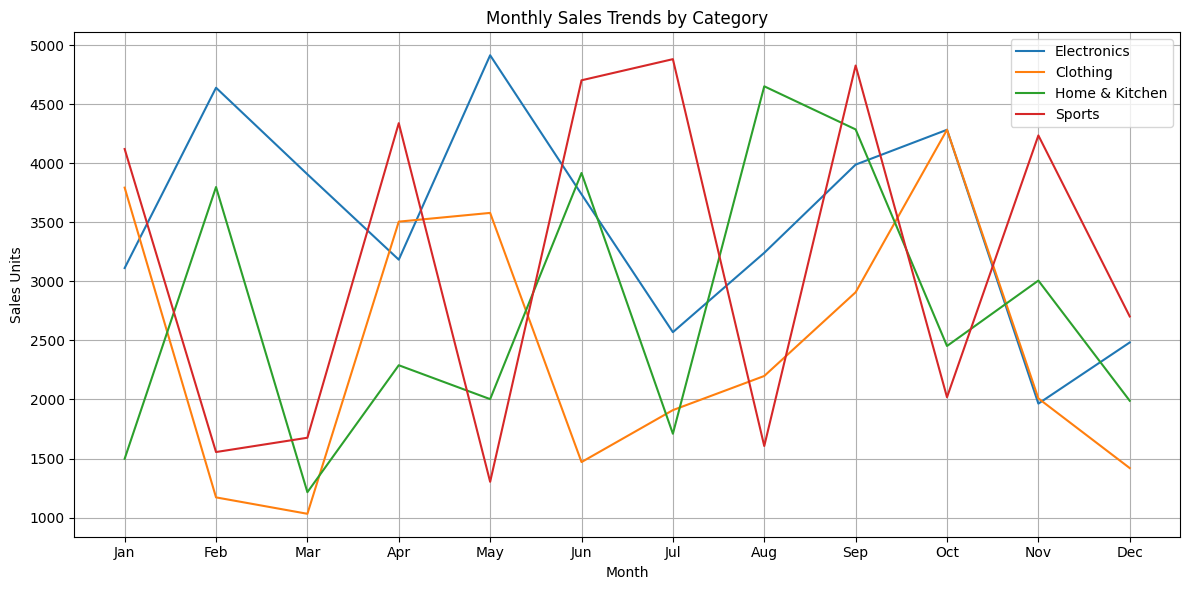

In [13]:
plt.figure(figsize=(12, 6))
for category in categories:
    plt.plot(df.index, df[category], label=category)

plt.title('Monthly Sales Trends by Category')
plt.xlabel('Month')
plt.ylabel('Sales Units')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


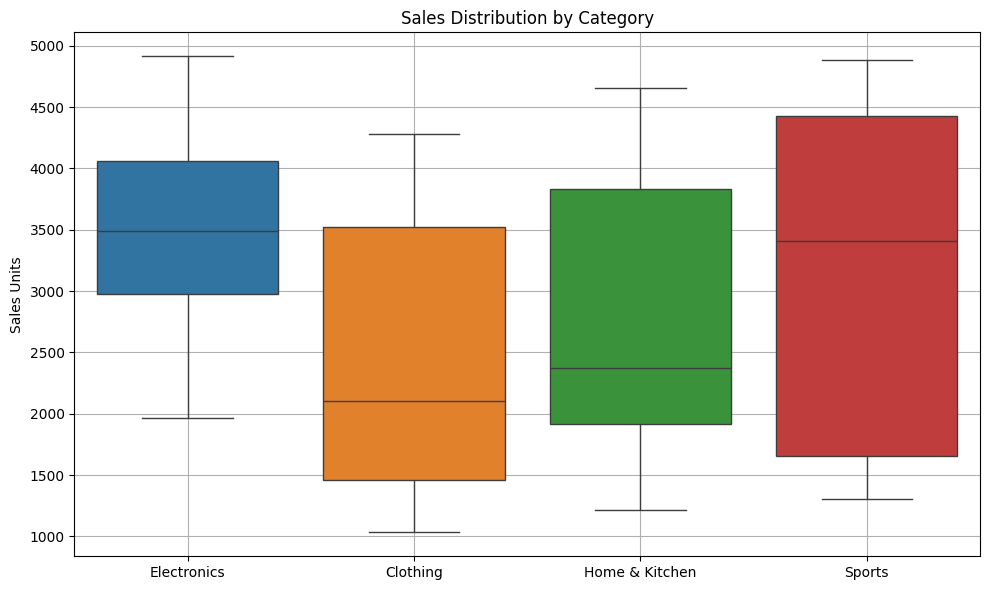

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[categories])
plt.title('Sales Distribution by Category')
plt.ylabel('Sales Units')
plt.grid(True)
plt.tight_layout()
plt.show()


Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])
i. Find element-wise absolute value
ii. Find the 25th, 50th, and 75th percenƟle of flaƩened array, for each column, for each
row.
iii. Mean, Median and Standard DeviaƟon of flaƩened array, of each column, and
each row

In [15]:
import numpy as np

array = np.array([[1, -2, 3], [-4, 5, -6]])
print("Original Array:\n", array)


Original Array:
 [[ 1 -2  3]
 [-4  5 -6]]


In [16]:
abs_array = np.abs(array)
print("Element-wise Absolute Value:\n", abs_array)


Element-wise Absolute Value:
 [[1 2 3]
 [4 5 6]]


In [18]:
flat_array = array.flatten()
percentiles_flat = np.percentile(flat_array, [25, 50, 75])
print("Flattened Array Percentiles (25th, 50th, 75th):", percentiles_flat)

percentiles_col = {
    '25th': np.percentile(array, 25, axis=0),
    '50th': np.percentile(array, 50, axis=0),
    '75th': np.percentile(array, 75, axis=0)
}
print("Column-wise Percentiles:")
for k, v in percentiles_col.items():
    print(f"{k}: {v}")

percentiles_row = {
    '25th': np.percentile(array, 25, axis=1),
    '50th': np.percentile(array, 50, axis=1),
    '75th': np.percentile(array, 75, axis=1)
}
print("Row-wise Percentiles:")
for k, v in percentiles_row.items():
    print(f"{k}: {v}")



Flattened Array Percentiles (25th, 50th, 75th): [-3.5 -0.5  2.5]
Column-wise Percentiles:
25th: [-2.75 -0.25 -3.75]
50th: [-1.5  1.5 -1.5]
75th: [-0.25  3.25  0.75]
Row-wise Percentiles:
25th: [-0.5 -5. ]
50th: [ 1. -4.]
75th: [2.  0.5]


In [19]:
print("Flattened Array Stats:")
print("Mean:", np.mean(flat_array))
print("Median:", np.median(flat_array))
print("Standard Deviation:", np.std(flat_array))

print("\nColumn-wise Stats:")
print("Mean:", np.mean(array, axis=0))
print("Median:", np.median(array, axis=0))
print("Standard Deviation:", np.std(array, axis=0))

print("\nRow-wise Stats:")
print("Mean:", np.mean(array, axis=1))
print("Median:", np.median(array, axis=1))
print("Standard Deviation:", np.std(array, axis=1))


Flattened Array Stats:
Mean: -0.5
Median: -0.5
Standard Deviation: 3.8622100754188224

Column-wise Stats:
Mean: [-1.5  1.5 -1.5]
Median: [-1.5  1.5 -1.5]
Standard Deviation: [2.5 3.5 4.5]

Row-wise Stats:
Mean: [ 0.66666667 -1.66666667]
Median: [ 1. -4.]
Standard Deviation: [2.05480467 4.78423336]
